In [1]:
import torch
print(torch.cuda.is_available())		 # 查看GPu设备是否可用
print(torch.cuda.device_count()) 		 # 查看GPu设备数量
print(torch.cuda.get_device_name())   	 # 查看当前GPu设备名称，默认设备id从0开始
print(torch.cuda.current_device())

True
3
NVIDIA RTX A6000
0


In [2]:
import os
import random
import numpy as np
import torch
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from utils.tools import dotdict

# reproducibility
fix_seed = 2021
random.seed(fix_seed)
np.random.seed(fix_seed)
torch.manual_seed(fix_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(fix_seed)

# experiment settings
args = dotdict()

args.root_path = './dataset/EPS/'                 # directory containing permno10000.csv and permno10000.pt
args.data_path = 'permno10000.csv'
args.model_id = 'permno10000_forecast'
args.model = 'AutoTimes_Llama'
args.data = 'permno10000'

# sequence parameters (match preprocess token_len / seq_len / label_len)
args.seq_len = 76
args.label_len = 24
args.token_len = args.seq_len - args.label_len   # 52
args.test_seq_len = args.seq_len
args.test_label_len = args.label_len
args.test_pred_len = args.token_len               # match pred_len for forecasting

args.batch_size = 32
args.learning_rate = 0.001
args.train_epochs = 10
args.mlp_hidden_layers = 0
args.mlp_hidden_dim = 256
args.mlp_activation = 'tanh'
args.weight_decay = 0
args.loss = 'MSE'
args.lradj = 'type1'
args.patience = 3
args.cosine = True
args.tmax = 10
args.mix_embeds = True
args.use_amp = True
args.drop_last = True
args.num_workers = 0

# checkpoints / directories
args.checkpoints = './checkpoints/'
args.test_dir = './test_results/'
args.test_file_name = 'checkpoint.pth'
args.val_set_shuffle = True
args.visualize = True
args.features = 'M'
args.llm_ckp_dir = '/ssd1/muntasir/Desktop/AutoTimes/llama-7b'
args.gpu = 1

print("Args in experiment:")
for key, val in args.items():
    print(f"{key}: {val}")

# Set GPU device
os.environ["CUDA_VISIBLE_DEVICES"] = str(args.gpu)

Args in experiment:
root_path: ./dataset/EPS/
data_path: permno10000.csv
model_id: permno10000_forecast
model: AutoTimes_Llama
data: permno10000
seq_len: 76
label_len: 24
token_len: 52
test_seq_len: 76
test_label_len: 24
test_pred_len: 52
batch_size: 32
learning_rate: 0.001
train_epochs: 10
mlp_hidden_layers: 0
mlp_hidden_dim: 256
mlp_activation: tanh
weight_decay: 0
loss: MSE
lradj: type1
patience: 3
cosine: True
tmax: 10
mix_embeds: True
use_amp: True
drop_last: True
num_workers: 0
checkpoints: ./checkpoints/
test_dir: ./test_results/
test_file_name: checkpoint.pth
val_set_shuffle: True
visualize: True
features: M
llm_ckp_dir: /ssd1/muntasir/Desktop/AutoTimes/llama-7b
gpu: 1


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(args.gpu)

# Initialize experiment
exp = Exp_Long_Term_Forecast(args)

# Build a concise experiment setting name
setting = (
    f"{args.model_id}_{args.model}_{args.data}"
    f"_sl{args.seq_len}_ll{args.label_len}_tl{args.token_len}"
    f"_lr{args.learning_rate}_bt{args.batch_size}"
    f"_wd{args.weight_decay}_hd{args.mlp_hidden_dim}"
    f"_hl{args.mlp_hidden_layers}_cos{args.cosine}"
    f"_mix{args.mix_embeds}_{args.des}"
)

print(f">>>>>>>>>> Start training: {setting} >>>>>>>>>>>>>>>>>")
exp.train(setting)

print(f">>>>>>>>>> Start testing: {setting} <<<<<<<<<<<<<<<<<<<<<")
exp.test(setting)

# Clear GPU cache to free memory after inference
torch.cuda.empty_cache()

Device: cuda:1


Loading checkpoint shards: 100%|██████████| 2/2 [00:07<00:00,  3.70s/it]


Use linear encoder & decoder
>>>>>>>>>> Start training: permno10000_forecast_AutoTimes_Llama_permno10000_sl76_ll24_tl52_lr0.001_bt32_wd0_hd256_hl0_cosTrue_mixTrue_None >>>>>>>>>>>>>>>>>
train 56
val 56
test 56
add_scale torch.float32 torch.Size([])
mark_proj.weight torch.float32 torch.Size([4096, 2])
mark_proj.bias torch.float32 torch.Size([4096])
encoder.weight torch.float32 torch.Size([4096, 52])
encoder.bias torch.float32 torch.Size([4096])
decoder.weight torch.float32 torch.Size([52, 4096])
decoder.bias torch.float32 torch.Size([52])
next learning rate is 0.001
token_num: 2, seq_len: 104, token_len: 52
fold_out: torch.Size([32, 2, 52]), token_num: 2


RuntimeError: The size of tensor a (104) must match the size of tensor b (76) at non-singleton dimension 1

In [ ]:
import torch
x = torch.randn(10, 104)
token_len = 52
if x.size(1) % token_len != 0:
    pad = token_len - (x.size(1) % token_len)
    x = torch.nn.functional.pad(x, (0, pad))
out = x.unfold(1, token_len, token_len)
print(out.shape)  # should be [10, token_num, token_len]

In [ ]:

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
exp = Exp_Long_Term_Forecast(args)
# setting record of experiments
setting = '{}_{}_{}_sl{}_ll{}_tl{}_lr{}_bt{}_wd{}_hd{}_hl{}_cos{}_mix{}_{}'.format(
    args.model_id,
    args.model,
    args.data,
    args.seq_len,
    args.label_len,
    args.token_len,
    args.learning_rate,
    args.batch_size,
    args.weight_decay,
    args.mlp_hidden_dim,
    args.mlp_hidden_layers,
    args.cosine,
    args.mix_embeds,
    args.des)
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
exp.train(setting)
print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
exp.test(setting)
torch.cuda.empty_cache()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
img = Image.open('test_results/ETTh1_672_96_AutoTimes_Llama_ETTh1_sl672_ll576_tl96_lr0.0005_bt256_wd0_hd256_hl0_cosTrue_mixTrue_test/96/0.png')
# 使用matplotlib显示图片
plt.imshow(img)
plt.axis('off') 
plt.show()

In [2]:
import torch
x_enc = torch.tensor([
  # Sample 1
  [[1,  2,  3],   # t=0
   [4,  5,  6],   # t=1
   [7,  8,  9],   # t=2
   [10,11,12],    # t=3
   [13,14,15],    # t=4
   [16,17,18]],   # t=5

  # Sample 2
  [[101,102,103],
   [104,105,106],
   [107,108,109],
   [110,111,112],
   [113,114,115],
   [116,117,118]]
])

In [4]:
x_enc.shape

torch.Size([2, 6, 3])

In [5]:
x_enc = x_enc.permute(0, 2, 1)  # [bs, n_vars, seq_len]

In [6]:
x_enc

tensor([[[  1,   4,   7,  10,  13,  16],
         [  2,   5,   8,  11,  14,  17],
         [  3,   6,   9,  12,  15,  18]],

        [[101, 104, 107, 110, 113, 116],
         [102, 105, 108, 111, 114, 117],
         [103, 106, 109, 112, 115, 118]]])

In [7]:
bs = 2
n_vars = 3

In [8]:
x_enc = x_enc.reshape(bs * n_vars, -1)  # [bs * n_vars, seq_len]

In [9]:
x_enc

tensor([[  1,   4,   7,  10,  13,  16],
        [  2,   5,   8,  11,  14,  17],
        [  3,   6,   9,  12,  15,  18],
        [101, 104, 107, 110, 113, 116],
        [102, 105, 108, 111, 114, 117],
        [103, 106, 109, 112, 115, 118]])

In [13]:
token_len = 2

In [14]:
fold_out = x_enc.unfold(dimension=-1, size=token_len, step=token_len)

In [15]:
fold_out

tensor([[[  1,   4],
         [  7,  10],
         [ 13,  16]],

        [[  2,   5],
         [  8,  11],
         [ 14,  17]],

        [[  3,   6],
         [  9,  12],
         [ 15,  18]],

        [[101, 104],
         [107, 110],
         [113, 116]],

        [[102, 105],
         [108, 111],
         [114, 117]],

        [[103, 106],
         [109, 112],
         [115, 118]]])

In [1]:
import numpy as np

# Replace with your actual file path
preds = np.load('/ssd1/muntasir/Desktop/AutoTimes/test_results/long_term_forecast_PANELCOV_672_96_AutoTimes_Llama_panel_cov_sl36_ll32_tl4_lr1e-05_bt2_wd0_hd256_hl2_cosFalse_mixFalse_test_0/predictions.npy')
trues = np.load('/ssd1/muntasir/Desktop/AutoTimes/test_results/long_term_forecast_PANELCOV_672_96_AutoTimes_Llama_panel_cov_sl36_ll32_tl4_lr1e-05_bt2_wd0_hd256_hl2_cosFalse_mixFalse_test_0/ground_truth.npy')

In [2]:
print(preds.shape)  # (num_samples, pred_len, num_features)
print(trues.shape)  # (num_samples, pred_len, num_features)

(29977, 4, 1)
(29977, 4, 1)


In [7]:
import numpy as np
from utils.metrics import metric

# 1-step ahead only (next quarter)
pred_1 = preds[:, 0, :]   # (N, 1)
true_1 = trues[:, 0, :]   # (N, 1)

mae, mse, rmse, mape, mspe, r2, kelly_r2 = metric(pred_1, true_1)
print(f"[H=1 only]  MSE: {mse:.6f}  MAE: {mae:.6f}  R²: {r2:.6f}  Kelly R²: {kelly_r2:.6f}")

[H=1 only]  MSE: 0.539287  MAE: 0.345649  R²: 0.717107  Kelly R²: 0.758957


In [8]:
for h in range(preds.shape[1]):  # 0..3
    p = preds[:, h, :]
    t = trues[:, h, :]
    mae, mse, rmse, mape, mspe, r2, kelly_r2 = metric(p, t)
    print(f"H={h+1}: MSE={mse:.6f} MAE={mae:.6f} R²={r2:.6f} KellyR²={kelly_r2:.6f}")

H=1: MSE=0.539287 MAE=0.345649 R²=0.717107 KellyR²=0.758957
H=2: MSE=0.731089 MAE=0.417614 R²=0.642204 KellyR²=0.696361
H=3: MSE=0.931510 MAE=0.515432 R²=0.575135 KellyR²=0.640301
H=4: MSE=1.126671 MAE=0.563417 R²=0.522350 KellyR²=0.596300


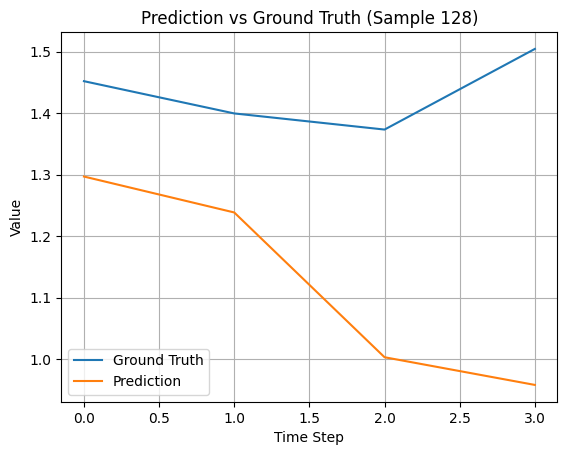

In [29]:
import matplotlib.pyplot as plt

i = 128  # index of sample
plt.plot(trues[i, :, 0], label='Ground Truth')
plt.plot(preds[i, :, 0], label='Prediction')
plt.legend()
plt.title(f"Prediction vs Ground Truth (Sample {i})")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.grid(True)
plt.show()

Row frequency guess (train): 92 days 00:00:00
    PERMNO  s_idx  enc_start    enc_end  tgt_start    tgt_end
0  10026.0      0 1990-03-01 2016-09-01 1991-09-01 2017-12-01
1  10026.0      1 1990-06-01 2016-12-01 1991-12-01 2018-03-01
2  10026.0      2 1990-09-01 2017-03-01 1992-03-01 2018-06-01
3  10026.0      3 1990-12-01 2017-06-01 1992-06-01 2018-09-01
4  10026.0      4 1991-09-01 2017-12-01 1992-09-01 2018-12-01
Saved: test_windows.png


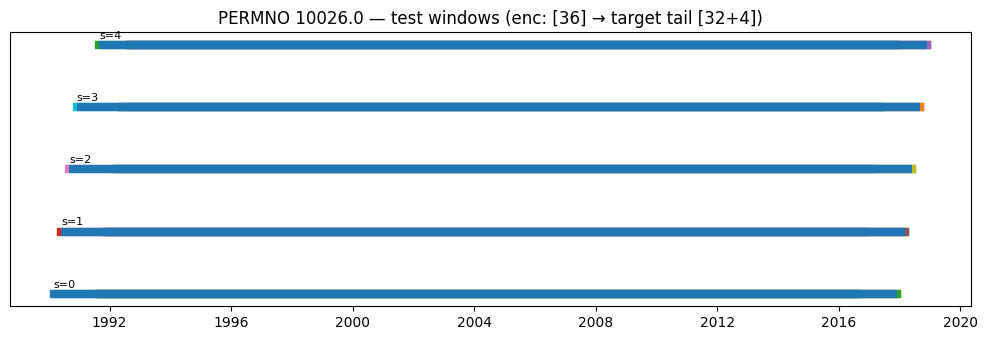

In [6]:
import pandas as pd
import numpy as np
from data_provider.panel_cov_loader import Dataset_PanelCov
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def summarize_windows(ds, permno=None, take=10):
    """Return a small table of encoder/target time spans for a given entity (or first seen)."""
    rows = []
    for ent, s in ds.index_pairs:
        gid = ds.series_ids[ent]
        if permno is not None and gid != permno:
            continue
        d = ds.series_dates[ent]
        s_end   = s + ds.seq_len
        r_begin = s_end - ds.label_len
        r_end   = s_end + ds.pred_len
        rows.append({
            'PERMNO': gid,
            's_idx': s,
            'enc_start': pd.Timestamp(d[s]),
            'enc_end':   pd.Timestamp(d[s_end - 1]),
            'tgt_start': pd.Timestamp(d[r_begin]),
            'tgt_end':   pd.Timestamp(d[r_end - 1]),
        })
        if len(rows) >= take:
            break
    return pd.DataFrame(rows)

def guess_row_frequency(dates_np):
    """Heuristic: median delta of consecutive dates."""
    d = pd.to_datetime(pd.Series(dates_np))
    delta = d.diff().dropna()
    return delta.median() if not delta.empty else pd.Timedelta(0)

def plot_windows(ds, permno, take=10, save_path=None):
    """Plot encoder (blue) vs target (orange) spans for a single PERMNO."""
    dfw = summarize_windows(ds, permno=permno, take=take)
    if dfw.empty:
        print(f"No windows found for PERMNO={permno} in split={ds.flag}")
        return dfw

    fig, ax = plt.subplots(figsize=(10, 2 + 0.3*len(dfw)))
    y0 = 0
    for i, row in dfw.iterrows():
        # encoder segment
        ax.plot([row['enc_start'], row['enc_end']], [y0, y0], lw=6)
        # target segment
        ax.plot([row['tgt_start'], row['tgt_end']], [y0, y0], lw=6)
        # color the second segment differently
        ax.plot([row['tgt_start'], row['tgt_end']], [y0, y0], lw=6)
        # Use different styles for enc/target
        ax.hlines(y0, row['enc_start'], row['enc_end'], linewidth=6)
        ax.hlines(y0, row['tgt_start'], row['tgt_end'], linewidth=6)
        # labels
        ax.text(row['enc_start'], y0+0.1, f"s={row['s_idx']}", fontsize=8)
        y0 += 1

    ax.set_title(f"PERMNO {permno} — {ds.flag} windows (enc: [{ds.seq_len}] → target tail [{ds.label_len}+{ds.pred_len}])")
    ax.set_yticks([])
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150)
        print("Saved:", save_path)
    else:
        plt.show()
    return dfw

# Example usage:
# Build datasets (adjust paths/args to your environment)
# Train/Val/Test are built separately with the appropriate size triplets.
train_ds = Dataset_PanelCov(root_path='./dataset/panel', data_path='panel_cleaned.csv',
                            flag='train', size=[36, 32, 4],
                            id_col='PERMNO', time_col='DATE', y_col='actual')

val_ds   = Dataset_PanelCov(root_path='./dataset/panel', data_path='panel_cleaned.csv',
                            flag='val',   size=[36, 32, 4],
                            id_col='PERMNO', time_col='DATE', y_col='actual')

test_ds  = Dataset_PanelCov(root_path='./dataset/panel', data_path='panel_cleaned.csv',
                            flag='test',  size=[36, 32, 4],  # or [test_seq_len, test_label_len, test_pred_len]
                            id_col='PERMNO', time_col='DATE', y_col='actual')

# Pick a PERMNO present in that split
if len(test_ds.index_pairs):
    sample_ent = test_ds.index_pairs[0][0]
    sample_permno = test_ds.series_ids[sample_ent]
    # Summaries
    print("Row frequency guess (train):", guess_row_frequency(train_ds.series_dates[sample_ent]))
    print(summarize_windows(test_ds, permno=sample_permno, take=5))
    # Plot a few windows
    plot_windows(test_ds, permno=sample_permno, take=5, save_path='test_windows.png')

In [24]:
import pandas as pd

df = pd.read_csv('/ssd1/muntasir/Desktop/AutoTimes/dataset/custom/permno10000.csv')

In [27]:
df

,date,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,at_turn,pay_turn,rect_turn,sale_equity,sale_invcap,...,debt_capital,bm,CAPEI,evm,pe_exi,pe_inc,pe_op_basic,ps,ptb,actual
0,1990-03,0.171930,0.829268,0.175943,0.172474,0.859975,0.275389,0.847491,0.172131,0.758794,...,0.171004,0.055718,0.875307,0.448659,0.593454,0.389562,0.590786,0.413351,0.554440,0.235
1,1990-06,0.201754,0.799652,0.206463,0.200348,0.867410,0.270384,0.900830,0.179259,0.756281,...,0.208178,0.070870,0.866391,0.451278,0.573618,0.376541,0.240954,0.376939,0.508368,0.330
2,1990-09,0.180702,0.820557,0.184919,0.179443,0.858736,0.281726,0.911695,0.171597,0.749581,...,0.185874,0.083578,0.840205,0.443106,0.485027,0.318387,0.421214,0.296022,0.377830,0.250
3,1990-12,0.164912,0.836237,0.168761,0.163763,0.856258,0.292613,0.927104,0.168033,0.752094,...,0.167286,0.125611,0.854630,0.385687,0.557781,0.366145,0.504158,0.354012,0.460327,0.370
4,1991-03,0.128070,0.872822,0.131059,0.128920,0.830235,0.336746,0.800079,0.155203,0.738693,...,0.122677,0.096774,0.862070,0.362846,0.629223,0.413042,0.585607,0.406608,0.511715,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2020-12,0.868421,0.137631,0.885099,0.897213,0.190830,0.803614,0.354405,0.143621,0.134003,...,0.851301,0.340176,0.800740,0.452640,0.385878,0.253303,0.252079,0.238256,0.222682,1.160
124,2021-03,0.740351,0.263066,0.754039,0.735192,0.236679,0.768743,0.371395,0.112259,0.178392,...,0.719331,0.311828,0.810576,0.261002,0.355260,0.233204,0.250693,0.300967,0.279583,0.520
125,2021-06,0.791228,0.214286,0.806104,0.721254,0.244114,0.876117,0.443105,0.134890,0.179229,...,0.771375,0.213099,0.816050,0.269174,0.339999,0.223186,0.245951,0.295572,0.268754,0.500
126,2021-09,0.743860,0.259582,0.759425,0.722997,0.273854,0.901596,0.450217,0.128653,0.202680,...,0.723048,0.228250,0.817622,0.230511,0.313860,0.206028,0.221221,0.295572,0.270919,0.550
